# Apple Visualization Project:

Hi, Using the Apple App Store dataset, here below are 12 graph plots I created using the Matplotlib and Seaborn libraries to present different factors in the app store using it's different features.

Enjoy!

**Alon Firestein**

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [98]:
df = pd.read_csv("AppleStore.csv", encoding='utf-8')

In [99]:
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


#### **Here we have a small sample of the apple store dataset, and with this we base the graphs on.**

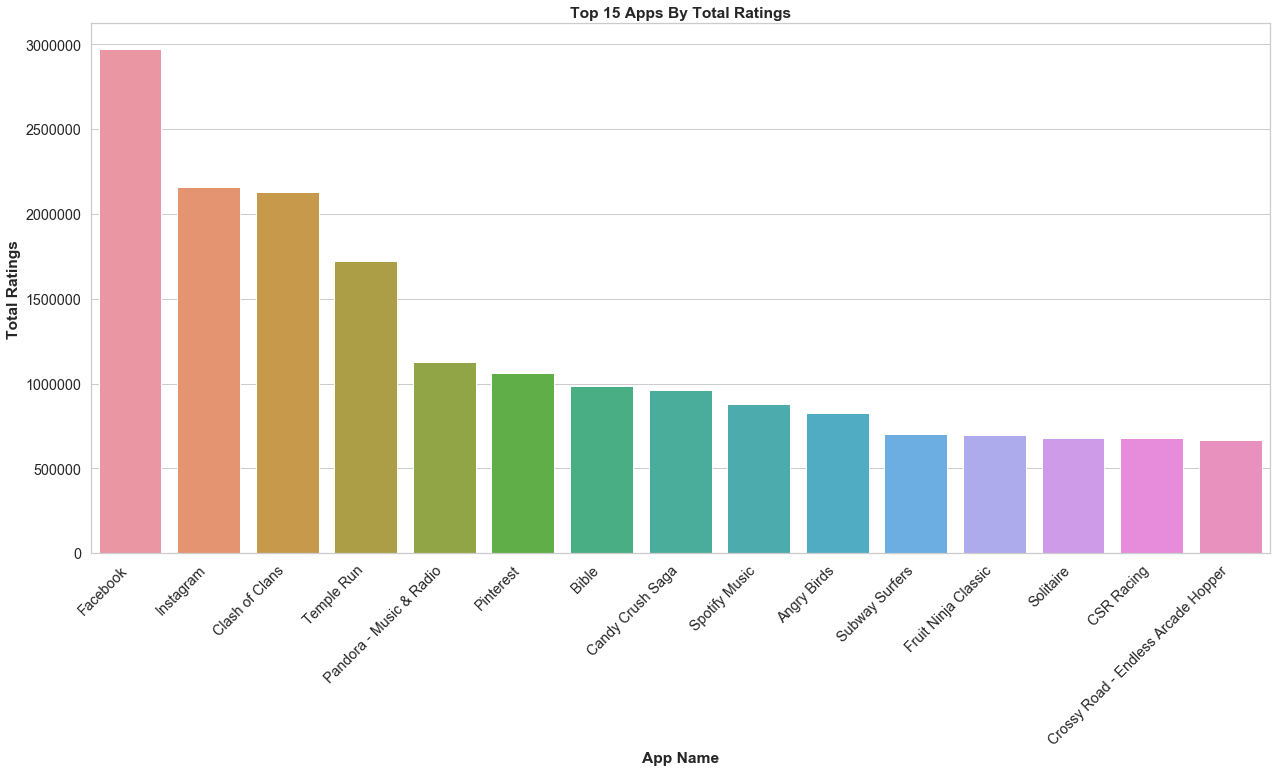

In [100]:
top15 = df.sort_values("rating_count_tot", ascending = False)[:15]
x = top15["track_name"]
y = top15["rating_count_tot"]
plt.figure(figsize=(18, 11))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
top15plot = sns.barplot(x, y, data = top15)
top15plot.set_xticklabels(top15plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Top 15 Apps By Total Ratings", fontweight="bold")
plt.ylabel("Total Ratings", fontweight="bold")
plt.xlabel("App Name", fontweight="bold")
plt.tight_layout()
plt.savefig("Top15.png")
plt.show(top15plot)

**In this graph:**

We can see the top 15 applications in the app store by the number of total ratings it got from users over time.



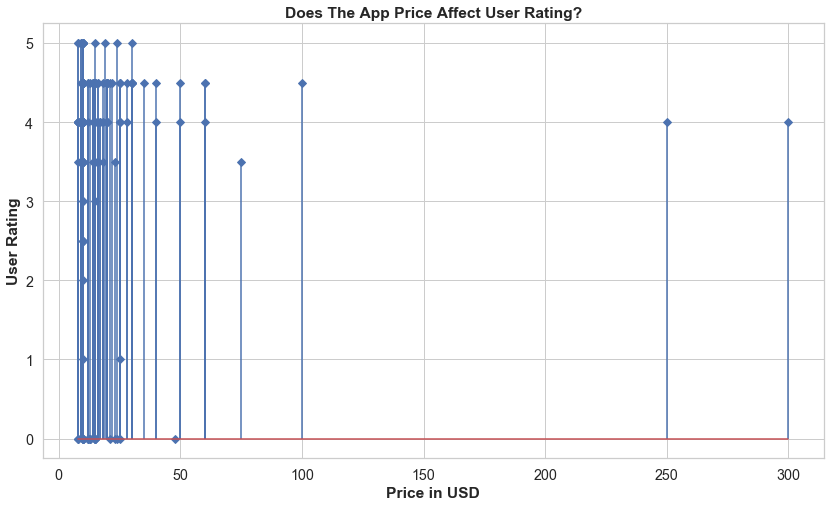

In [111]:
mostExpensive = df.sort_values("price",ascending = False)[:200]
x = mostExpensive["price"]
y = mostExpensive["user_rating"]
fig = plt.figure(figsize=(14,8))
plt.stem(x, y, use_line_collection=True, markerfmt = 'D')
plt.title("Does The App Price Affect User Rating?", fontweight="bold")
plt.ylabel("User Rating", fontweight="bold")
plt.xlabel("Price in USD", fontweight="bold")
plt.savefig("App Price Affect Rating.png")
plt.show()

**In This Graph:**

We can see that an application that's more expensive does not mean that it is perfect and will have a higher rating than other cheaper apps. In this graph we can prove it, and we can see that there are apps that cost a lot less money, and still have a higher rating than those expensive applications.

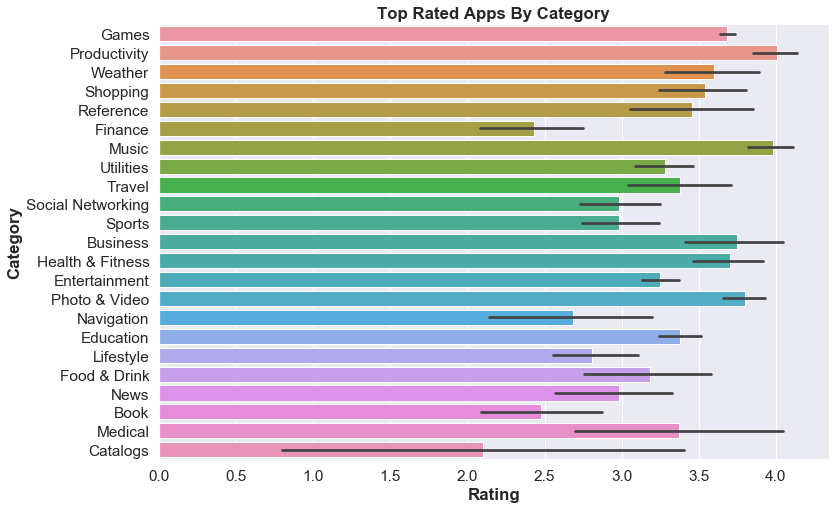

In [104]:
sns.barplot(y='prime_genre',x='user_rating', data=df)
sns.set_style("whitegrid")
plt.gcf().set_size_inches(12, 8)
plt.title("Top Rated Apps By Category", fontweight="bold")
plt.ylabel("Category", fontweight="bold")
plt.xlabel("Rating", fontweight="bold")
plt.savefig("Top Rated by Category.png", bbox_inches = "tight")

**In this graph:**

We can see the average rating of the applications in the app store per the different categories. As well as the Standard Deviation shown by the black lines on each bar.

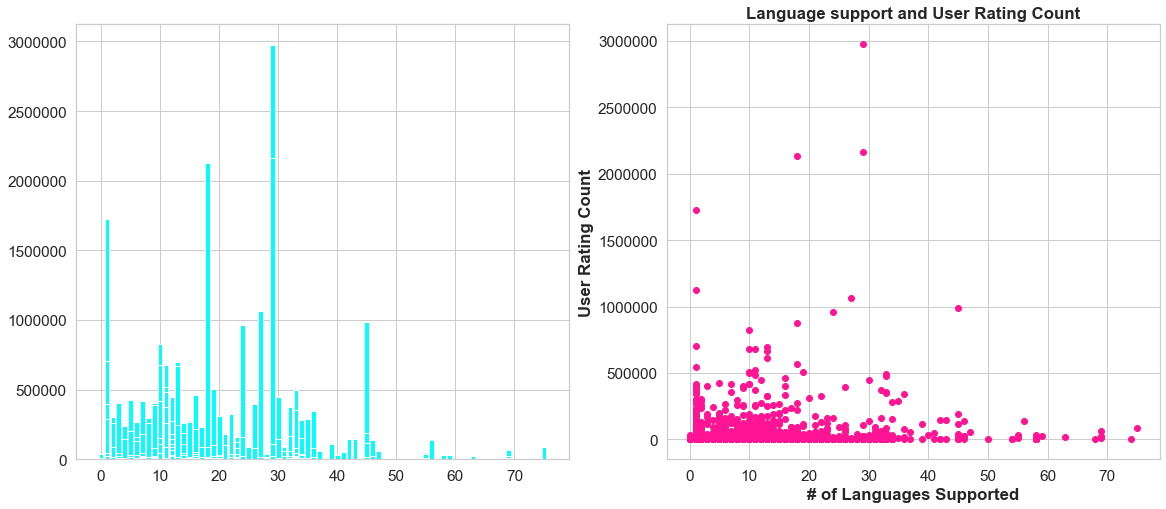

In [105]:
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.bar(df['lang.num'], df['rating_count_tot'], color = 'aqua')
plt.subplot(132)
plt.scatter(df['lang.num'], df['rating_count_tot'], color = 'deeppink')
plt.title('Language support and User Rating Count', fontweight="bold")
plt.ylabel("User Rating Count", fontweight="bold")
plt.xlabel("# of Languages Supported", fontweight="bold")
plt.savefig("Language Support and User Rating Count.png")
plt.show()

**In this graph:**

We can see 2 graphs explaining the same situation in different ways. They both show the applictations that support the most languages and how many user ratings it has in total.

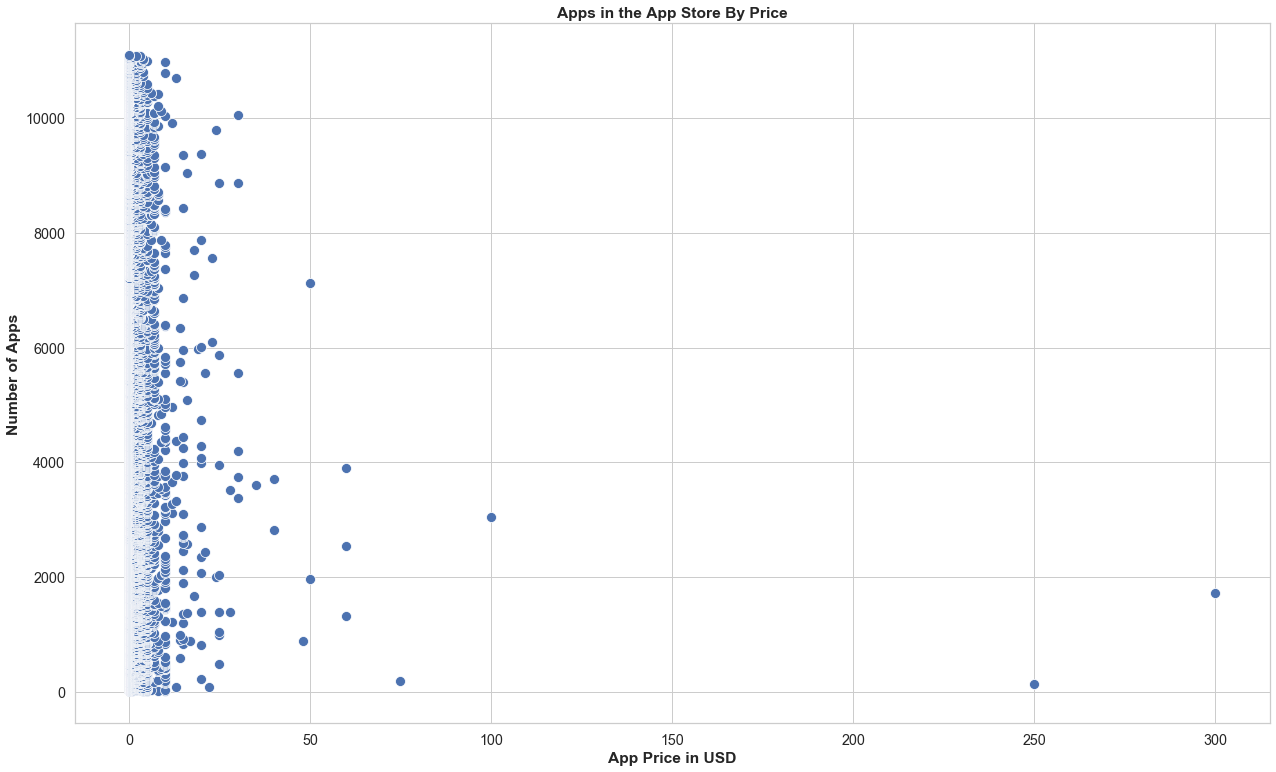

In [102]:
x = df["price"]
y = df["Unnamed: 0"]
plt.figure(figsize=(18, 11))
ax = sns.scatterplot(x, y, s = 100, markers = "O", data=df)
plt.title("Apps in the App Store By Price", fontweight="bold")
plt.ylabel("Number of Apps", fontweight="bold")
plt.xlabel("App Price in USD", fontweight="bold")
plt.savefig("ByPrice.png")
plt.tight_layout()

**In this graph:**

We can see all of the applictations in the app store arranged by it's price in USD. Most of the applications are in the 0$-10$ range therefore most the area is packed with dots symbolizing the applications. 

Only very few apps in the apps store pass the 50$ mark.

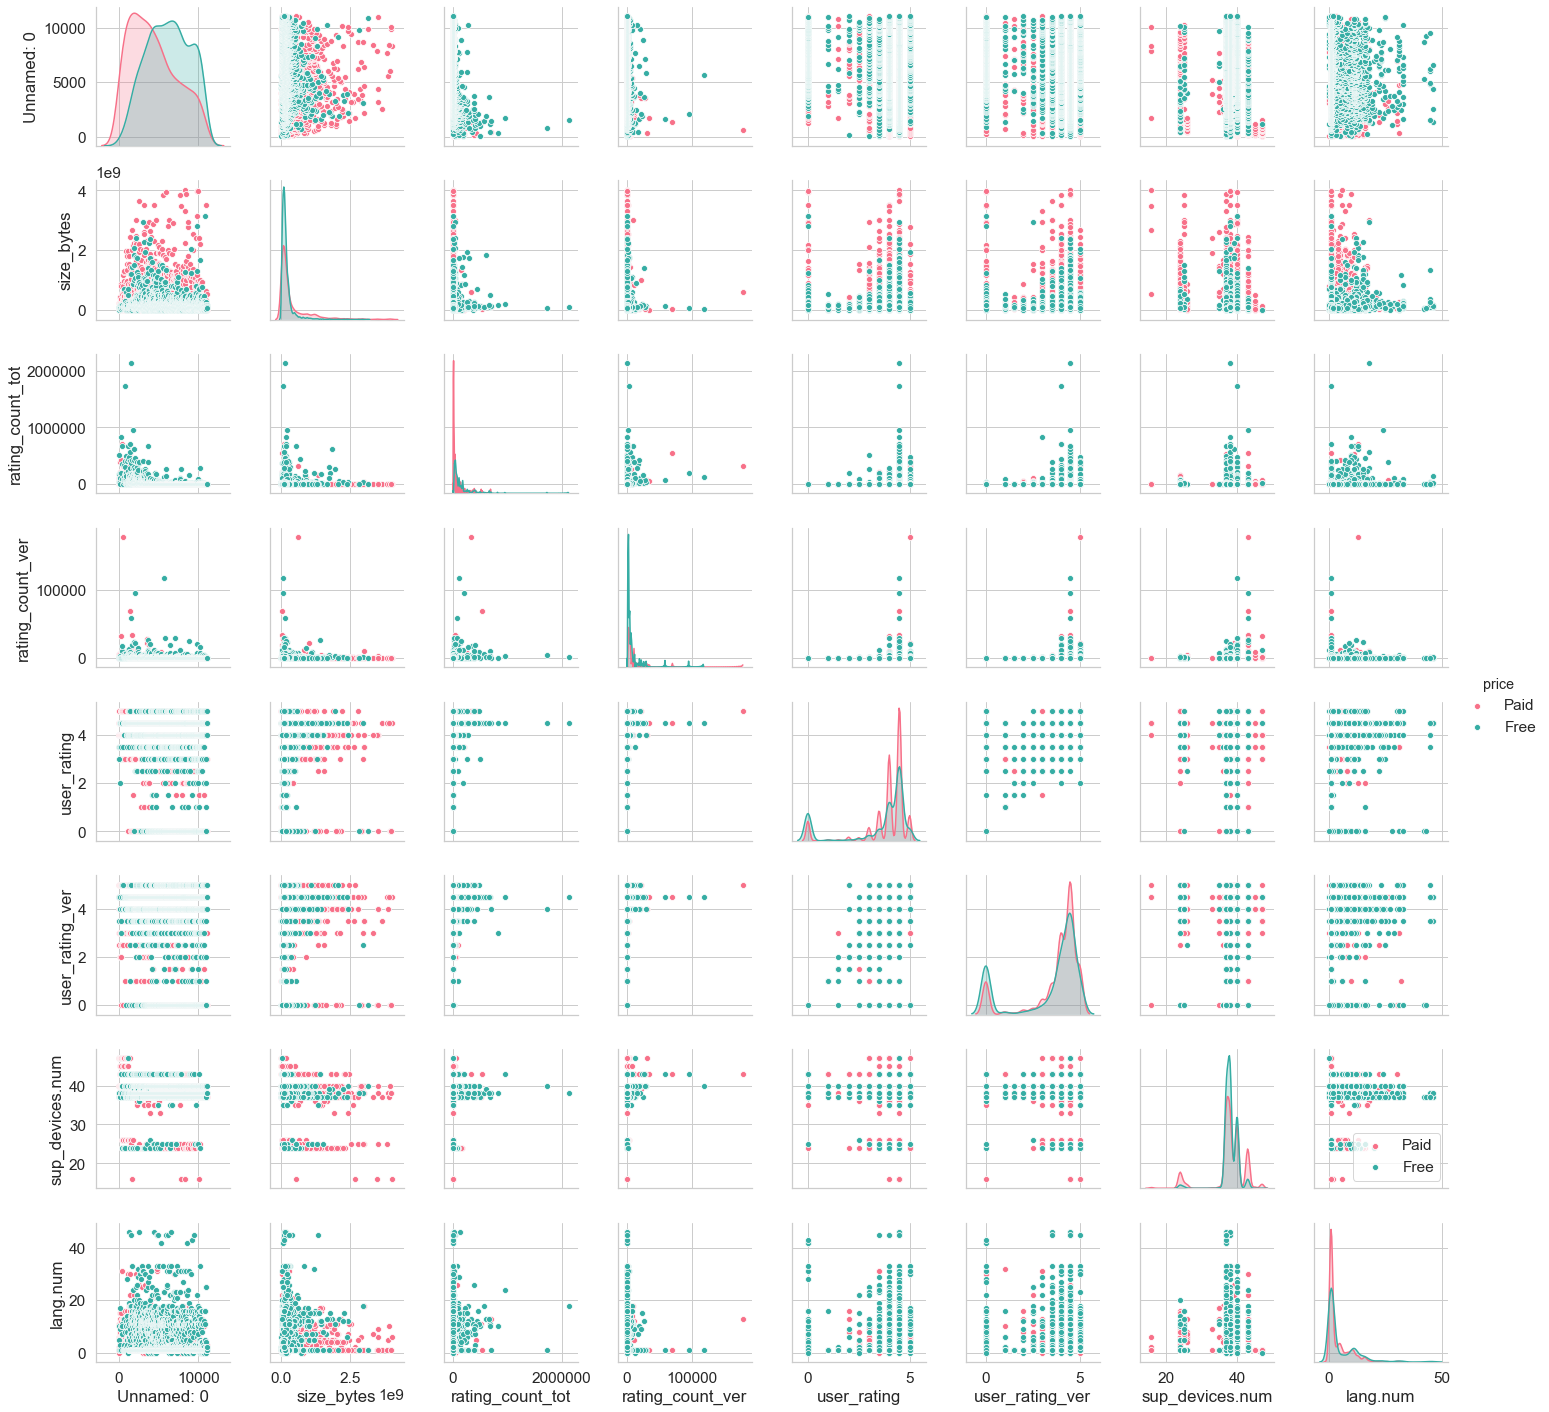

In [106]:
dfGames = df.copy()
dfGames = dfGames[dfGames['prime_genre']=='Games']
dfGames.loc[dfGames['price']!=0,'price']='Paid'
dfGames.loc[dfGames['price']==0,'price']='Free'
sns.plot = sns.pairplot(dfGames[dfGames['prime_genre']=='Games'], kind='scatter', palette="husl", hue='price')
plt.savefig("Free and Paid Games Pairplot.png", bbox_inches = "tight")
plt.legend()
plt.show()

**In this graph:**

We can see here a pairplot showing the differences between **Free**(green) and **Paid**(pink) Games in all of the datasets features together.

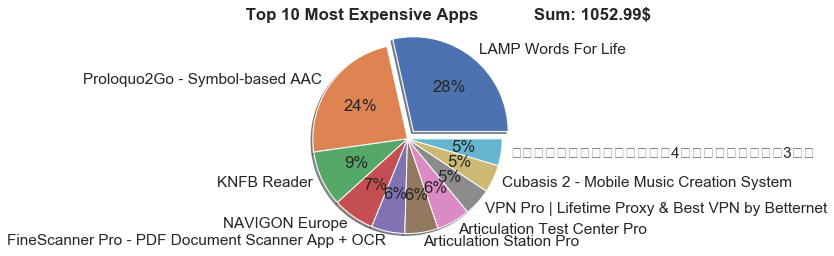

In [107]:
mostMoney = df.sort_values("price", ascending = False)[:10]
labels = mostMoney["track_name"]
num = mostMoney["price"]
fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax.pie(num, labels=labels, autopct='%1.0f%%', explode = explode, shadow = True)
plt.axis('equal')
plt.title("                 Top 10 Most Expensive Apps            Sum: 1052.99$", fontweight="bold")
plt.savefig("Top 10 Pie Chart.png", bbox_inches = "tight")
plt.show()

**In this graph:**

We can see a Pie Chart of the 10 most expensive apps on the market (totalling a sum of 1052.99$). The pie chart divides those 10 apps by the precentage of how much each apps accounts for in the total sum of the graph.

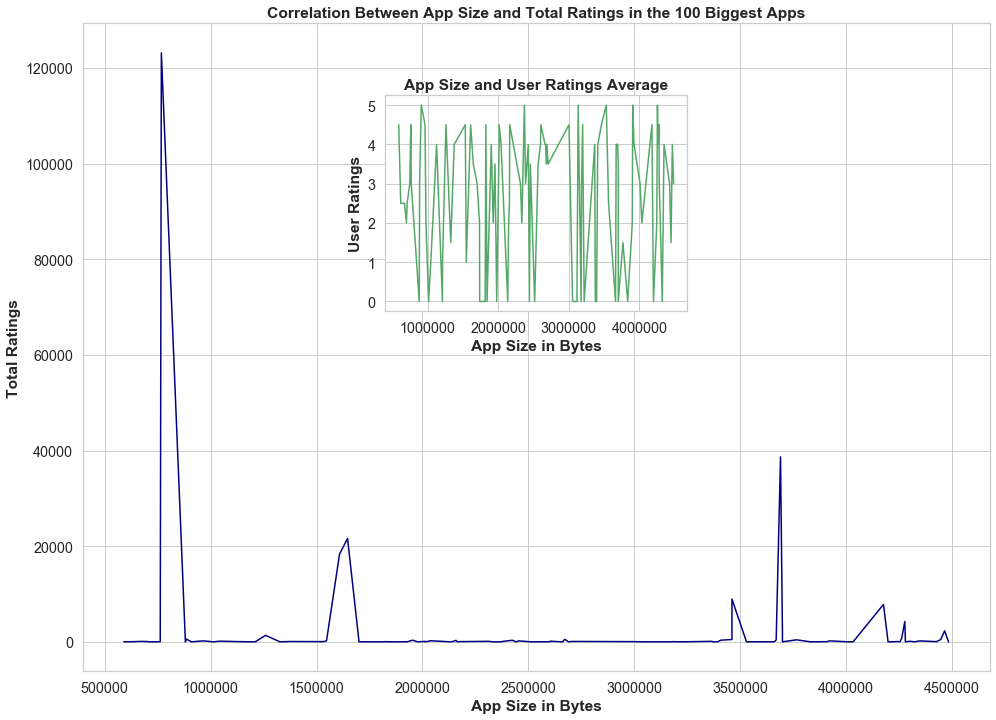

In [109]:
fig = plt.figure(figsize=(14,10))
biggestApps = df.sort_values("size_bytes")[:100]
x = biggestApps["size_bytes"]
y = biggestApps["rating_count_tot"]
z = biggestApps["user_rating"]
axes_main = fig.add_axes([0.6, 0.4, 0.9, 0.9])
axes_inside = fig.add_axes([0.9, 0.9, 0.3, 0.3]) 

axes_main.plot(x, y, color='navy')
axes_main.set_xlabel('App Size in Bytes', fontweight="bold")
axes_main.set_ylabel('Total Ratings', fontweight="bold")
axes_main.set_title('Correlation Between App Size and Total Ratings in the 100 Biggest Apps', fontweight="bold")

axes_inside.plot(x, z, color='g')
axes_inside.set_xlabel('App Size in Bytes', fontweight="bold")
axes_inside.set_ylabel('User Ratings', fontweight="bold")
axes_inside.set_title('App Size and User Ratings Average', fontweight="bold");
plt.savefig("App Size and Ratings Correlation.png", bbox_inches = "tight")

**In This Graph:**

We can see a graph describing the 100 biggest apps on the market and its connection the total ratings it has. The second smaller graph shows those same apps and its association to its average user rating. 

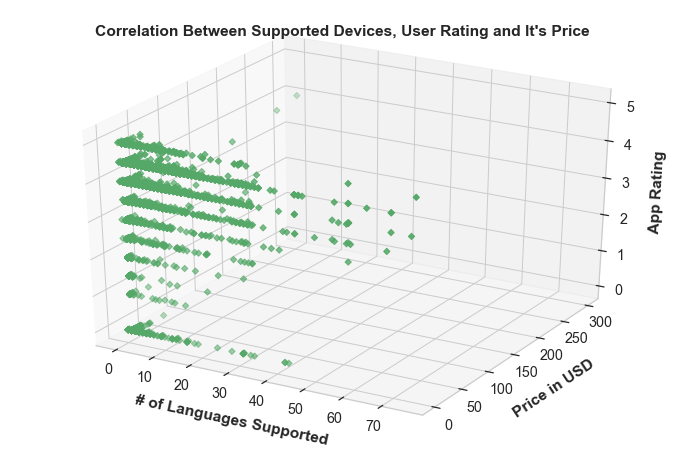

In [110]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
x = df["lang.num"]
y = df["price"]
z = df["user_rating"]
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter(x,y,z,c='g', marker='D')
plt.title("Correlation Between Supported Devices, User Rating and It's Price", fontweight="bold")
ax.set_xlabel("# of Languages Supported", labelpad=15, fontweight="bold")
ax.set_ylabel("Price in USD", labelpad=15, fontweight="bold")
ax.set_zlabel("App Rating",labelpad=10, fontweight="bold")
plt.savefig("3D Supported devices, price and rating.png")

**In This Graph:**

With a 3D graph, we can interpret that the applications that have more languages supported usually have a higher rating, and most of them are either free or very cheap, indicating that apps that cost money are not always better and that people are satisfied with free/cheaper apps.

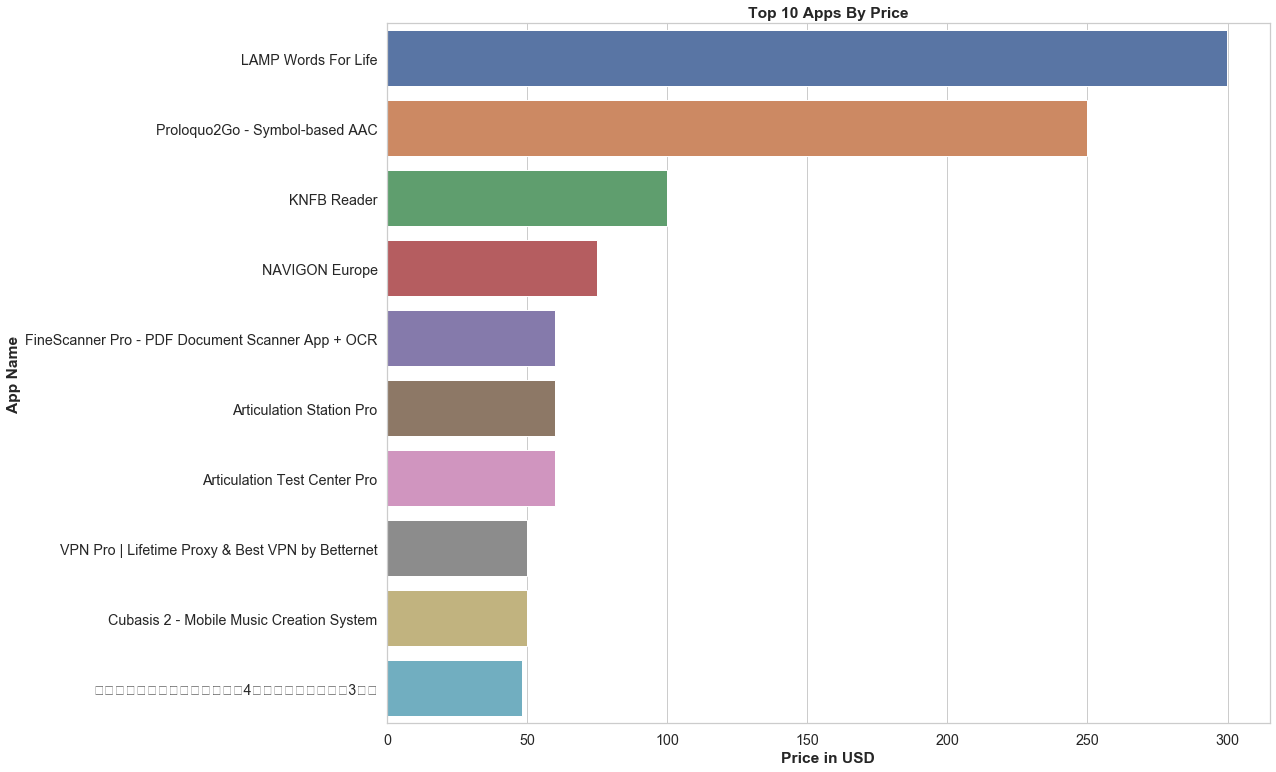

In [108]:
top10price = df.sort_values("price", ascending = False)[:10]
x = top10price["price"]
y = top10price["track_name"]
plt.figure(figsize=(18, 11))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
topPriceplot = sns.barplot(x, y, data = top10price)
plt.title("Top 10 Apps By Price", fontweight="bold")
plt.ylabel("App Name", fontweight="bold")
plt.xlabel("Price in USD", fontweight="bold")
plt.tight_layout()
plt.savefig("Top 10 Apps By Price.png", bbox_inches = "tight")

**In This Graph:**

Now here we can see the most expensive apps, its full price, and the app compared to to rest of the top 10.

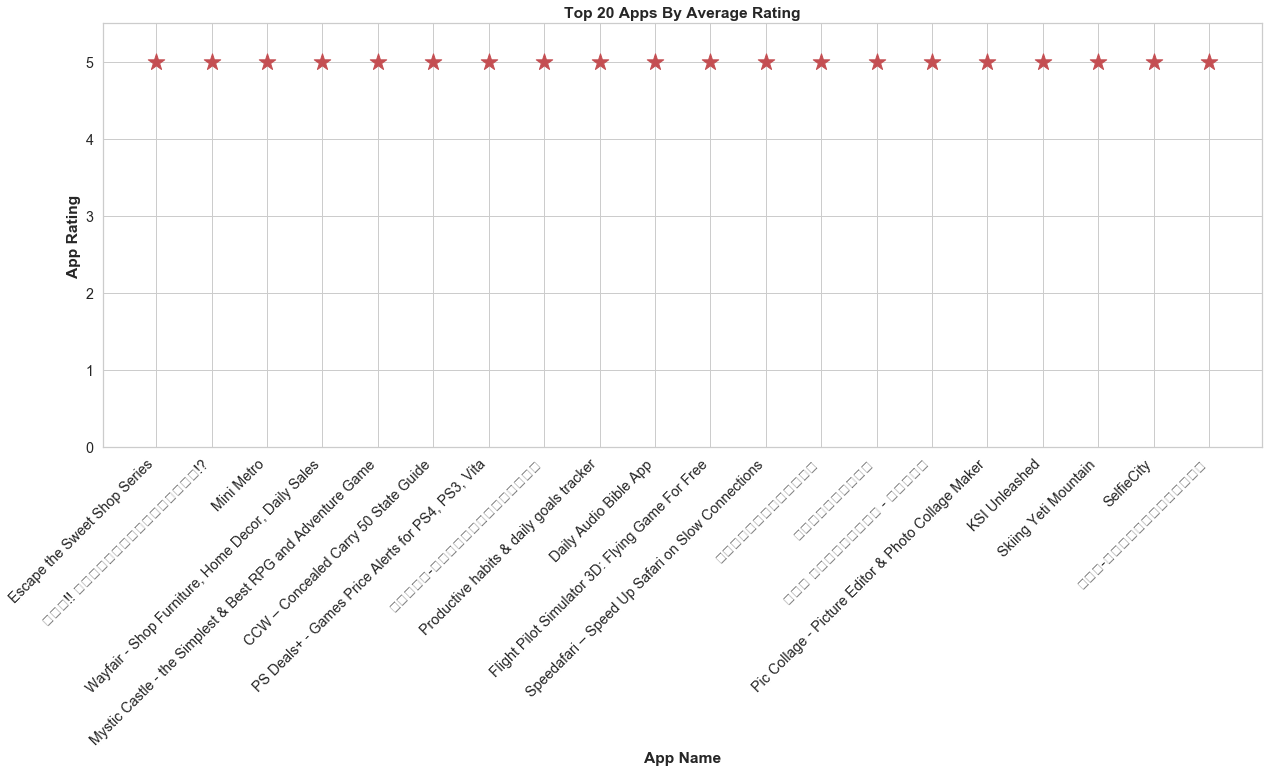

In [101]:
top20 = df.sort_values("user_rating", ascending = False)[:20]
x = top20["track_name"]
y = top20["user_rating"]
plt.figure(figsize=(18, 11))

plt.scatter(x, y, color = 'r', marker='*', s=300)
plt.title("Top 20 Apps By Average Rating", fontweight="bold")
plt.ylabel("App Rating", fontweight="bold")
plt.xlabel("App Name", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 5.5)
plt.tight_layout()
plt.savefig("Top20.png", bbox_inches = "tight")
plt.show()

**In this graph:**

We can see 20 of the top applications in the app store. As you can see, they all have a 5 star rating, as is predicted giving that there are thousands of applictations in the app store and the rating system is only out of 5. The apps which are unreadable are apps that are named in a different language (unreadable by Jupyter).

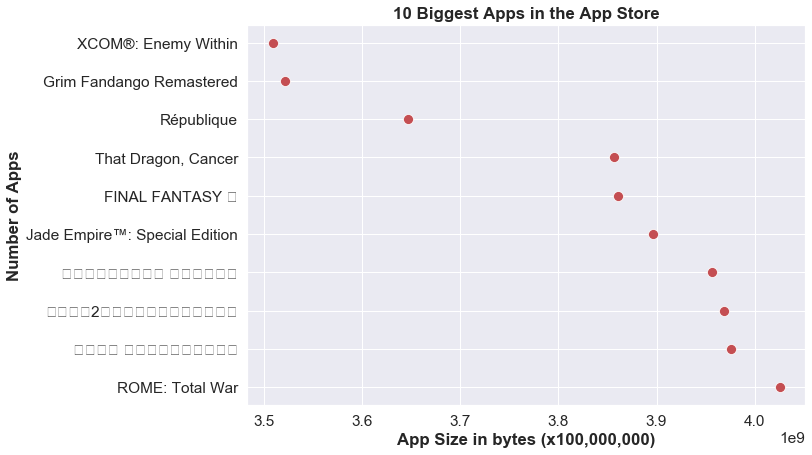

In [103]:
biggestApps = df.sort_values("size_bytes", ascending = False)[:10]
sns.set(style="white")
plt.figure(figsize=(10, 7))
x = biggestApps["size_bytes"]
y = biggestApps["track_name"]
sns.set(font_scale = 1.4)
ax = sns.scatterplot(x, y, s=100, data = biggestApps, color = 'r')
plt.title("10 Biggest Apps in the App Store", fontweight="bold")
plt.ylabel("Number of Apps", fontweight="bold")
plt.xlabel("App Size in bytes (x100,000,000)", fontweight="bold")
plt.savefig("Top10 Biggest By Size.png", bbox_inches = "tight")
plt.show()

**In this graph:**

We can see the 10 biggest applictations in the app store by size in bytes. To put it in perspective, **ROME: Total War**, the largest app in the app store takes up over 400,000,000 bytes in size, which is just over 4GB of storage.

The unreadble applications are in a different language and unreadble by Jupyter